In [1]:
from datetime import datetime
from concurrent import futures

import pandas as pd
from pandas import DataFrame
!pip install pandas-datareader
import pandas_datareader.data as web

In [2]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^IXIC']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.
df = pd.read_csv('^IXIC_data.csv')


^IXIC
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
df=df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Name'])

In [5]:
df

,Close
Date,
2016-08-12,5232.890137
2016-08-15,5262.020020
2016-08-16,5227.109863
2016-08-17,5228.660156
2016-08-18,5240.149902
...,...
2021-08-06,14835.759766
2021-08-09,14860.179688
2021-08-10,14788.089844


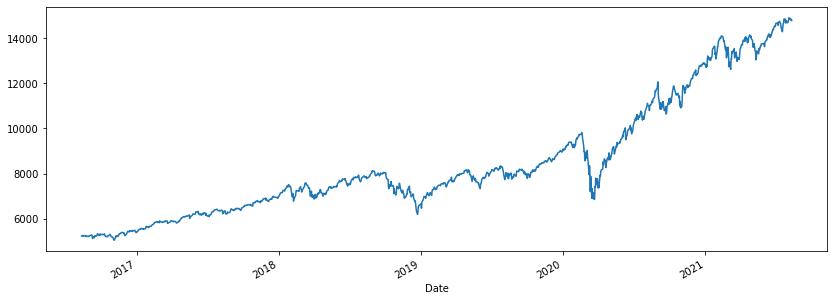

In [6]:
df['Close'].plot(figsize = (14,5));

In [7]:
IXIC = df

In [8]:
IXIC

,Close
Date,
2016-08-12,5232.890137
2016-08-15,5262.020020
2016-08-16,5227.109863
2016-08-17,5228.660156
2016-08-18,5240.149902
...,...
2021-08-06,14835.759766
2021-08-09,14860.179688
2021-08-10,14788.089844


In [9]:
IXIC.describe()

,Close
count,1259.000000
mean,8464.212980
std,2595.532306
min,5046.370117
25%,6682.449951
50%,7751.770020
75%,9500.705078
max,14895.120117


In [10]:
cutoff = round(IXIC.shape[0]*0.9)

In [11]:
cutoff

1133

In [12]:
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools
#from pmdarima import auto_arima

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


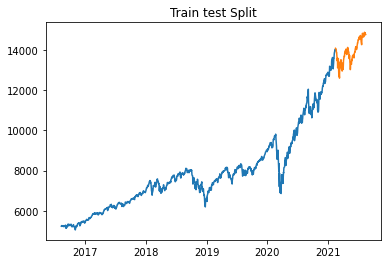

In [13]:
train = IXIC[:cutoff]
test = IXIC[cutoff:]

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.set_title('Train test Split');

In [14]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^GSPC']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.
GSPC = pd.read_csv('^GSPC_data.csv')
GSPC

^GSPC
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,2186.280029,2179.419922,2183.739990,2184.050049,3000660000,2184.050049,^GSPC
1,2016-08-15,2193.810059,2186.080078,2186.080078,2190.149902,3078530000,2190.149902,^GSPC
2,2016-08-16,2186.239990,2178.139893,2186.239990,2178.149902,3196400000,2178.149902,^GSPC
3,2016-08-17,2183.080078,2168.500000,2177.840088,2182.219971,3388910000,2182.219971,^GSPC
4,2016-08-18,2187.030029,2180.459961,2181.899902,2187.020020,3300570000,2187.020020,^GSPC
...,...,...,...,...,...,...,...,...
1254,2021-08-06,4440.819824,4429.069824,4429.069824,4436.520020,2839970000,4436.520020,^GSPC
1255,2021-08-09,4439.390137,4424.740234,4437.770020,4432.350098,2779880000,4432.350098,^GSPC
1256,2021-08-10,4445.209961,4430.029785,4435.790039,4436.750000,3219840000,4436.750000,^GSPC
1257,2021-08-11,4449.439941,4436.419922,4442.180176,4442.410156,2803060000,4442.410156,^GSPC


In [15]:
from sklearn.pipeline import Pipeline

In [16]:
def clean(df, train_size):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df=df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Name'])
    cutoff = round(df.shape[0]*train_size)
    train = df[:cutoff]
    test = df[cutoff:]
    return train, test

In [17]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^DJI']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


^DJI
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [18]:
DJI = pd.read_csv('^DJI_data.csv')


In [19]:
DJI_train, DJI_test = clean(DJI, .9)

In [20]:
DJI_train

,Close
Date,
2016-08-12,18576.470703
2016-08-15,18636.050781
2016-08-16,18552.019531
2016-08-17,18573.939453
2016-08-18,18597.699219
...,...
2021-02-05,31148.240234
2021-02-08,31385.759766
2021-02-09,31375.830078


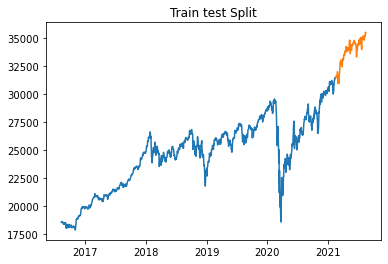

In [21]:
fig, ax = plt.subplots()
ax.plot(DJI_train)
ax.plot(DJI_test)
ax.set_title('Train test Split');

In [22]:
#!pip install --upgrade tensorflow
#import tensorflow as tf 
#from tensorflow import keras
#from tensorflow.keras import models
#from tensorflow.keras import layers
#from tensorflow.keras import optimizers
#from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM

In [23]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['GC=F']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


GC=F
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [24]:
Gold = pd.read_csv('GC=F_data.csv')


In [25]:
!pip install pystan==2.19.1.1
!pip install prophet
from prophet import Prophet as proph

In [26]:
Model = proph()

In [27]:
Gold.reset_index(inplace=True)

In [28]:
Gold['ds']=Gold['Date']

In [29]:
Gold['y']=Gold['Close']

In [30]:
Gold.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [31]:

Gold.drop('index',axis=1)

,ds,y
0,2016-08-12,1335.800049
1,2016-08-15,1340.300049
2,2016-08-16,1350.500000
3,2016-08-17,1342.699951
4,2016-08-18,1351.199951
...,...,...
1241,2021-08-06,1760.000000
1242,2021-08-09,1723.400024
1243,2021-08-10,1728.800049
1244,2021-08-11,1750.400024


In [32]:
cutoff=round(Gold.shape[0]*0.9)

In [33]:
Gold_train = Gold[:cutoff]
Gold_test = Gold[cutoff:]

In [34]:
Model.fit(Gold_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
train_preds=Model.predict(Gold_train)
test_preds=Model.predict(Gold_test)


In [36]:
train_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-12,1234.411517,1309.682343,1373.729146,1234.411517,1234.411517,107.602525,107.602525,107.602525,-18.836799,-18.836799,-18.836799,126.439324,126.439324,126.439324,0.0,0.0,0.0,1342.014042
1,2016-08-15,1235.198544,1312.766281,1376.412654,1235.198544,1235.198544,108.375026,108.375026,108.375026,-17.550781,-17.550781,-17.550781,125.925808,125.925808,125.925808,0.0,0.0,0.0,1343.573570
2,2016-08-16,1235.460886,1312.588514,1376.787521,1235.460886,1235.460886,107.368658,107.368658,107.368658,-18.011902,-18.011902,-18.011902,125.380559,125.380559,125.380559,0.0,0.0,0.0,1342.829543
3,2016-08-17,1235.723228,1311.753635,1375.763217,1235.723228,1235.723228,106.056581,106.056581,106.056581,-18.639073,-18.639073,-18.639073,124.695654,124.695654,124.695654,0.0,0.0,0.0,1341.779809
4,2016-08-18,1235.985570,1310.620250,1370.815498,1235.985570,1235.985570,105.717179,105.717179,105.717179,-18.182788,-18.182788,-18.182788,123.899967,123.899967,123.899967,0.0,0.0,0.0,1341.702749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2021-02-08,1973.534506,1853.422848,1916.975277,1973.534506,1973.534506,-86.877485,-86.877485,-86.877485,-17.550781,-17.550781,-17.550781,-69.326704,-69.326704,-69.326704,0.0,0.0,0.0,1886.657021
1117,2021-02-09,1974.370248,1856.095409,1921.071116,1974.370248,1974.370248,-85.446285,-85.446285,-85.446285,-18.011902,-18.011902,-18.011902,-67.434383,-67.434383,-67.434383,0.0,0.0,0.0,1888.923963
1118,2021-02-10,1975.205989,1859.198515,1923.555641,1975.205989,1975.205989,-84.054289,-84.054289,-84.054289,-18.639073,-18.639073,-18.639073,-65.415216,-65.415216,-65.415216,0.0,0.0,0.0,1891.151699
1119,2021-02-11,1976.041730,1861.743415,1927.632233,1976.041730,1976.041730,-81.484634,-81.484634,-81.484634,-18.182788,-18.182788,-18.182788,-63.301847,-63.301847,-63.301847,0.0,0.0,0.0,1894.557096


In [37]:
test_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-16,1980.220437,1876.499091,1940.531270,1980.220437,1980.220437,-70.609930,-70.609930,-70.609930,-18.011902,-18.011902,-18.011902,-52.598028,-52.598028,-52.598028,0.0,0.0,0.0,1909.610507
1,2021-02-17,1981.056178,1877.910188,1943.819017,1981.056178,1981.056178,-69.334159,-69.334159,-69.334159,-18.639073,-18.639073,-18.639073,-50.695086,-50.695086,-50.695086,0.0,0.0,0.0,1911.722019
2,2021-02-18,1981.891919,1883.401921,1947.030004,1981.891919,1981.891919,-67.139980,-67.139980,-67.139980,-18.182788,-18.182788,-18.182788,-48.957193,-48.957193,-48.957193,0.0,0.0,0.0,1914.751939
3,2021-02-19,1982.727661,1884.864797,1947.623813,1982.727661,1982.727661,-66.254179,-66.254179,-66.254179,-18.836799,-18.836799,-18.836799,-47.417380,-47.417380,-47.417380,0.0,0.0,0.0,1916.473482
4,2021-02-22,1985.234885,1888.857281,1956.633675,1985.234885,1985.234885,-61.816974,-61.816974,-61.816974,-17.550781,-17.550781,-17.550781,-44.266193,-44.266193,-44.266193,0.0,0.0,0.0,1923.417910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-08-06,2123.132200,2014.784616,2422.370189,1913.683357,2314.508652,101.013984,101.013984,101.013984,-18.836799,-18.836799,-18.836799,119.850783,119.850783,119.850783,0.0,0.0,0.0,2224.146184
121,2021-08-09,2125.639424,2015.586443,2435.828564,1909.126163,2324.077014,106.929175,106.929175,106.929175,-17.550781,-17.550781,-17.550781,124.479957,124.479957,124.479957,0.0,0.0,0.0,2232.568599
122,2021-08-10,2126.475165,2012.057244,2433.070223,1908.344353,2327.266467,107.391013,107.391013,107.391013,-18.011902,-18.011902,-18.011902,125.402914,125.402914,125.402914,0.0,0.0,0.0,2233.866177
123,2021-08-11,2127.310906,2011.163092,2440.554333,1907.835223,2328.869379,107.394970,107.394970,107.394970,-18.639073,-18.639073,-18.639073,126.034043,126.034043,126.034043,0.0,0.0,0.0,2234.705876


In [38]:
Gold_test

,index,ds,y
1121,1121,2021-02-16,1797.199951
1122,1122,2021-02-17,1771.099976
1123,1123,2021-02-18,1773.400024
1124,1124,2021-02-19,1775.800049
1125,1125,2021-02-22,1806.699951
...,...,...,...
1241,1241,2021-08-06,1760.000000
1242,1242,2021-08-09,1723.400024
1243,1243,2021-08-10,1728.800049
1244,1244,2021-08-11,1750.400024


In [39]:
from prophet.diagnostics import cross_validation


In [40]:
Gold_cv = cross_validation(Model, horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2019-08-14 12:00:00 and 2020-02-13 00:00:00


In [41]:
Gold_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-08-15,1492.189528,1472.671342,1511.337318,1519.599976,2019-08-14 12:00:00
1,2019-08-16,1495.057568,1477.007215,1512.733751,1512.500000,2019-08-14 12:00:00
2,2019-08-19,1501.418249,1481.162627,1520.151865,1500.400024,2019-08-14 12:00:00
3,2019-08-20,1502.866452,1484.209296,1520.278587,1504.599976,2019-08-14 12:00:00
4,2019-08-21,1505.456121,1487.928659,1524.701388,1504.599976,2019-08-14 12:00:00
...,...,...,...,...,...,...
495,2021-02-08,1965.672708,1268.664484,2673.205581,1831.900024,2020-02-13 00:00:00
496,2021-02-09,1967.047535,1267.170634,2686.248937,1835.300049,2020-02-13 00:00:00
497,2021-02-10,1969.748933,1273.527908,2684.600827,1840.599976,2020-02-13 00:00:00
498,2021-02-11,1971.492019,1271.383311,2694.795133,1824.900024,2020-02-13 00:00:00


In [42]:
testnoind=Gold_test.reset_index()

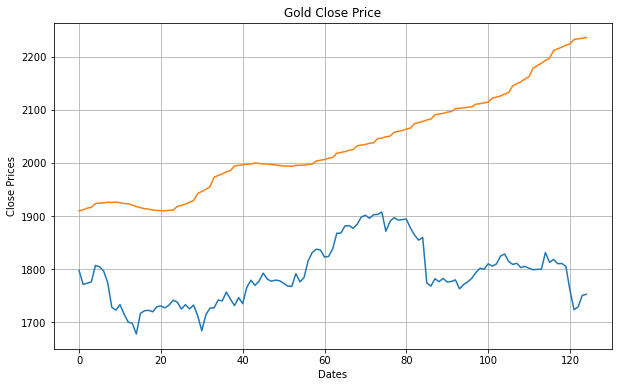

In [43]:

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(testnoind['y'])
plt.plot(test_preds['yhat'])
plt.title('Gold Close Price')
plt.show()

In [44]:
DJI

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2016-08-12,18606.060547,18535.859375,18595.650391,18576.470703,61580000,18576.470703,^DJI
2016-08-15,18722.609375,18559.929688,18588.589844,18636.050781,62350000,18636.050781,^DJI
2016-08-16,18614.859375,18550.650391,18614.480469,18552.019531,67570000,18552.019531,^DJI
2016-08-17,18582.349609,18468.679688,18537.089844,18573.939453,71000000,18573.939453,^DJI
2016-08-18,18600.820312,18533.289062,18566.539062,18597.699219,70740000,18597.699219,^DJI
...,...,...,...,...,...,...,...
2021-08-06,35246.789062,35077.441406,35077.441406,35208.511719,231570000,35208.511719,^DJI
2021-08-09,35229.671875,35041.238281,35229.671875,35101.851562,207850000,35101.851562,^DJI
2021-08-10,35285.160156,35091.910156,35135.171875,35264.671875,255040000,35264.671875,^DJI


In [45]:
GSPC_proph= GSPC
GSPC_proph['ds']=GSPC_proph['Date']
GSPC_proph['y']=GSPC_proph['Close']
GSPC_proph.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [46]:
GSPC_proph

,ds,y
0,2016-08-12,2184.050049
1,2016-08-15,2190.149902
2,2016-08-16,2178.149902
3,2016-08-17,2182.219971
4,2016-08-18,2187.020020
...,...,...
1254,2021-08-06,4436.520020
1255,2021-08-09,4432.350098
1256,2021-08-10,4436.750000
1257,2021-08-11,4442.410156


In [47]:
Model1 = proph(daily_seasonality=True)

In [48]:
GSPC_train = GSPC_proph[:cutoff]
GSPC_test = GSPC_proph[cutoff:]

In [49]:
GSPC_test

,ds,y
1121,2021-01-27,3750.770020
1122,2021-01-28,3787.379883
1123,2021-01-29,3714.239990
1124,2021-02-01,3773.860107
1125,2021-02-02,3826.310059
...,...,...
1254,2021-08-06,4436.520020
1255,2021-08-09,4432.350098
1256,2021-08-10,4436.750000
1257,2021-08-11,4442.410156


In [50]:
Model1.fit(GSPC_train)

In [51]:
GSPC_train_preds=Model1.predict(GSPC_train)
GSPC_test_preds=Model1.predict(GSPC_test)
testnoind2=GSPC_test.reset_index()

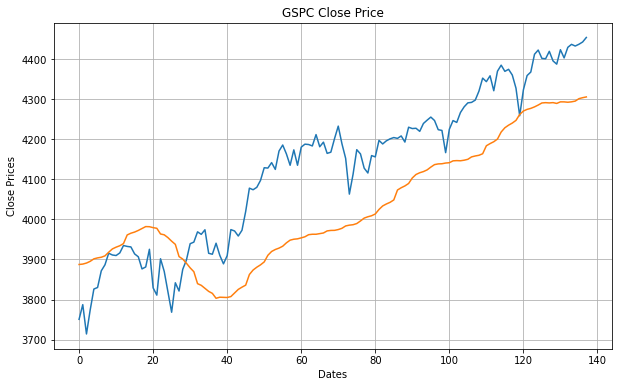

In [52]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(testnoind2['y'])
plt.plot(GSPC_test_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [53]:
import itertools
from sklearn.model_selection import ParameterGrid
from prophet.diagnostics import performance_metrics

In [54]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(GSPC_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f44d3b7f670>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f44d3b88f70>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f44d3b88d30>
Process ForkProcess-48:
Process ForkProcess-39:
Process ForkProcess-46:
Process ForkProcess-38:
Process ForkProcess-45:
Process ForkProcess-47:
Process ForkProcess-37:
Process ForkProcess-44:
Process ForkProcess-41:
Process ForkProcess-42:
Process ForkProcess-40:
Process ForkProcess-43:
Traceback (most recent call last):
Traceback (most recent call last):
Tra

KeyboardInterrupt: 

  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py",

In [55]:
Model2= proph(daily_seasonality=True,holidays_prior_scale = 0.1)

In [56]:
Model2.fit(GSPC_train)

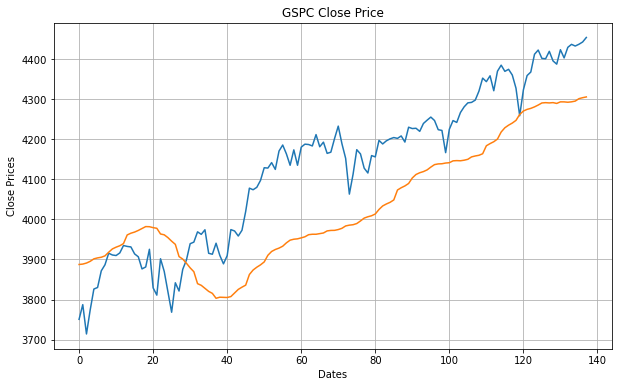

In [57]:
GSPC_train2_preds=Model2.predict(GSPC_train)
GSPC_test2_preds=Model2.predict(GSPC_test)
testnoind3=GSPC_test.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind3['y'])
plt.plot(GSPC_test2_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [58]:
GSPC_test2_preds[:30]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-27,3777.761916,3785.151450,3980.220888,3777.761916,3777.761916,109.803494,109.803494,109.803494,-15.586871,...,0.335061,0.335061,0.335061,125.055304,125.055304,125.055304,0.0,0.0,0.0,3887.565410
1,2021-01-28,3780.607335,3795.311528,3982.851657,3780.607335,3780.607335,107.943803,107.943803,107.943803,-15.586871,...,-1.017398,-1.017398,-1.017398,124.548073,124.548073,124.548073,0.0,0.0,0.0,3888.551138
2,2021-01-29,3783.452754,3787.066587,3984.617372,3783.452754,3783.452754,107.649964,107.649964,107.649964,-15.586871,...,-0.695974,-0.695974,-0.695974,123.932809,123.932809,123.932809,0.0,0.0,0.0,3891.102719
3,2021-02-01,3791.989011,3793.377601,3996.618422,3791.989011,3791.989011,103.385636,103.385636,103.385636,-15.586871,...,-3.148502,-3.148502,-3.148502,122.121010,122.121010,122.121010,0.0,0.0,0.0,3895.374647
4,2021-02-02,3794.834430,3801.083554,3995.117822,3794.834430,3794.834430,106.785901,106.785901,106.785901,-15.586871,...,0.630101,0.630101,0.630101,121.742671,121.742671,121.742671,0.0,0.0,0.0,3901.620331
5,2021-02-03,3797.679850,3800.876505,4010.457100,3797.679850,3797.679850,106.318804,106.318804,106.318804,-15.586871,...,0.335061,0.335061,0.335061,121.570614,121.570614,121.570614,0.0,0.0,0.0,3903.998653
6,2021-02-04,3800.525269,3802.692806,4007.447045,3800.525269,3800.525269,105.044522,105.044522,105.044522,-15.586871,...,-1.017398,-1.017398,-1.017398,121.648792,121.648792,121.648792,0.0,0.0,0.0,3905.569791
7,2021-02-05,3803.370688,3806.628978,4009.265167,3803.370688,3803.370688,105.727910,105.727910,105.727910,-15.586871,...,-0.695974,-0.695974,-0.695974,122.010755,122.010755,122.010755,0.0,0.0,0.0,3909.098598
8,2021-02-08,3811.906945,3821.757204,4017.539453,3811.906945,3811.906945,106.217552,106.217552,106.217552,-15.586871,...,-3.148502,-3.148502,-3.148502,124.952926,124.952926,124.952926,0.0,0.0,0.0,3918.124497
9,2021-02-09,3814.752364,3834.238409,4025.202848,3814.752364,3814.752364,111.580413,111.580413,111.580413,-15.586871,...,0.630101,0.630101,0.630101,126.537183,126.537183,126.537183,0.0,0.0,0.0,3926.332777


In [59]:
GSPC = pd.read_csv('^GSPC_data.csv')

In [60]:
GSPC

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,2186.280029,2179.419922,2183.739990,2184.050049,3000660000,2184.050049,^GSPC
1,2016-08-15,2193.810059,2186.080078,2186.080078,2190.149902,3078530000,2190.149902,^GSPC
2,2016-08-16,2186.239990,2178.139893,2186.239990,2178.149902,3196400000,2178.149902,^GSPC
3,2016-08-17,2183.080078,2168.500000,2177.840088,2182.219971,3388910000,2182.219971,^GSPC
4,2016-08-18,2187.030029,2180.459961,2181.899902,2187.020020,3300570000,2187.020020,^GSPC
...,...,...,...,...,...,...,...,...
1254,2021-08-06,4440.819824,4429.069824,4429.069824,4436.520020,2839970000,4436.520020,^GSPC
1255,2021-08-09,4439.390137,4424.740234,4437.770020,4432.350098,2779880000,4432.350098,^GSPC
1256,2021-08-10,4445.209961,4430.029785,4435.790039,4436.750000,3219840000,4436.750000,^GSPC
1257,2021-08-11,4449.439941,4436.419922,4442.180176,4442.410156,2803060000,4442.410156,^GSPC


In [61]:
GSPC_train = GSPC[cutoff:]
GSPC_test = GSPC[:cutoff]

In [62]:
tr=GSPC_train['Close'].diff(periods=3)
te=GSPC_test['Close'].diff(periods=3)

In [63]:
GSPC_train['Close']=tr
GSPC_test['Close']=te

<ipython-input-63-0978b1cda969>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_train['Close']=tr
<ipython-input-63-0978b1cda969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_test['Close']=te


In [64]:
GSPC_train.dropna(inplace=True)
GSPC_test.dropna(inplace=True)

<ipython-input-64-9329784c62aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_train.dropna(inplace=True)
<ipython-input-64-9329784c62aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_test.dropna(inplace=True)


In [65]:
GSPC_trainss = GSPC_train['Close'].values
GSPC_testss=GSPC_test['Close'].values

In [66]:
GSPC_trainss=GSPC_trainss.reshape(-1,1)
GSPC_testss=GSPC_testss.reshape(-1,1)

In [67]:
GSPC.shape

(1259, 8)

In [68]:
cutoff= round(GSPC.shape[0]*0.9)

In [69]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [70]:
GSPC_x_train, GSPC_y_train = create_dataset(GSPC_trainss)
GSPC_x_test, GSPC_y_test = create_dataset(GSPC_testss)

In [71]:
GSPC_x_train = np.reshape(GSPC_x_train, (GSPC_x_train.shape[0], GSPC_x_train.shape[1], 1))
GSPC_x_test = np.reshape(GSPC_x_test, (GSPC_x_test.shape[0], GSPC_x_test.shape[1], 1))

In [72]:

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [73]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(GSPC_x_train.shape[1], 1)))

model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [74]:
GSPC_x_train = np.reshape(GSPC_x_train, (GSPC_x_train.shape[0], GSPC_x_train.shape[1], 1))
GSPC_x_test = np.reshape(GSPC_x_test, (GSPC_x_test.shape[0], GSPC_x_test.shape[1], 1))

In [75]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
GSPC_x_train.shape

(85, 50, 1)

In [77]:
%config Completer.use_jedi = False

In [78]:
history = model.fit(GSPC_x_train, GSPC_y_train, epochs=216, batch_size=85)

Epoch 1/216
1/1 [==============================] - 0s 1ms/step - loss: 1958.4957
Epoch 2/216
1/1 [==============================] - 0s 1ms/step - loss: 1947.5764
Epoch 3/216
1/1 [==============================] - 0s 935us/step - loss: 1932.8809
Epoch 4/216
1/1 [==============================] - 0s 1ms/step - loss: 1900.3785
Epoch 5/216
1/1 [==============================] - 0s 951us/step - loss: 1828.1559
Epoch 6/216
1/1 [==============================] - 0s 961us/step - loss: 2103.7542
Epoch 7/216
1/1 [==============================] - 0s 1ms/step - loss: 1796.6653
Epoch 8/216
1/1 [==============================] - 0s 936us/step - loss: 1815.4254
Epoch 9/216
1/1 [==============================] - 0s 973us/step - loss: 1839.0432
Epoch 10/216
1/1 [==============================] - 0s 947us/step - loss: 1856.8038
Epoch 11/216
1/1 [==============================] - 0s 1ms/step - loss: 1867.2906
Epoch 12/216
1/1 [==============================] - 0s 921us/step - loss: 1871.4421
Epoch 13/21

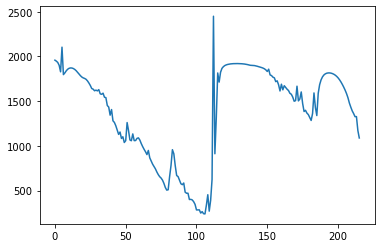

In [79]:
loss = history.history['loss']

plt.plot(range(len(loss)), loss)

In [80]:
np.ravel(model.predict(GSPC_x_test).reshape(-1,1))

array([17.878971  , 13.714074  , 15.255469  , ..., 36.736977  ,
        5.654625  , -0.90582925], dtype=float32)

In [81]:
GSPC_y_train

array([  -4.13964844,   42.4296875 ,   43.88037109,   38.59960938,
        -35.47998047,  -12.05029297,  -28.27978516,   45.22998047,
         14.20019531,   51.74023438,    3.01025391,   23.85009766,
         -5.55029297,    9.47998047,  -46.81005859,  -13.58007812,
          8.95996094,   67.93994141,   20.84033203,  -49.52001953,
       -169.56005859,  -75.93017578,   21.75      ,  100.25      ,
         15.33007812,  -58.16992188,   -4.16992188,   28.02978516,
         81.36962891,   29.00976562,   40.13037109,    3.83007812,
         15.97998047,    6.04980469,    7.24023438,  -11.25976562,
         27.85009766,   18.39990234,   34.40966797,  -10.34033203,
         12.66015625,   20.18017578,   35.60009766,    7.40966797,
        -23.73974609,  -33.29003906,  -80.13964844,    1.08984375,
         24.58007812,   75.38964844,   41.70019531,   34.26025391,
         48.77001953,   25.30957031,   16.79980469,   29.33007812,
         60.54003906,   46.04003906,   38.18994141,  -31.52001

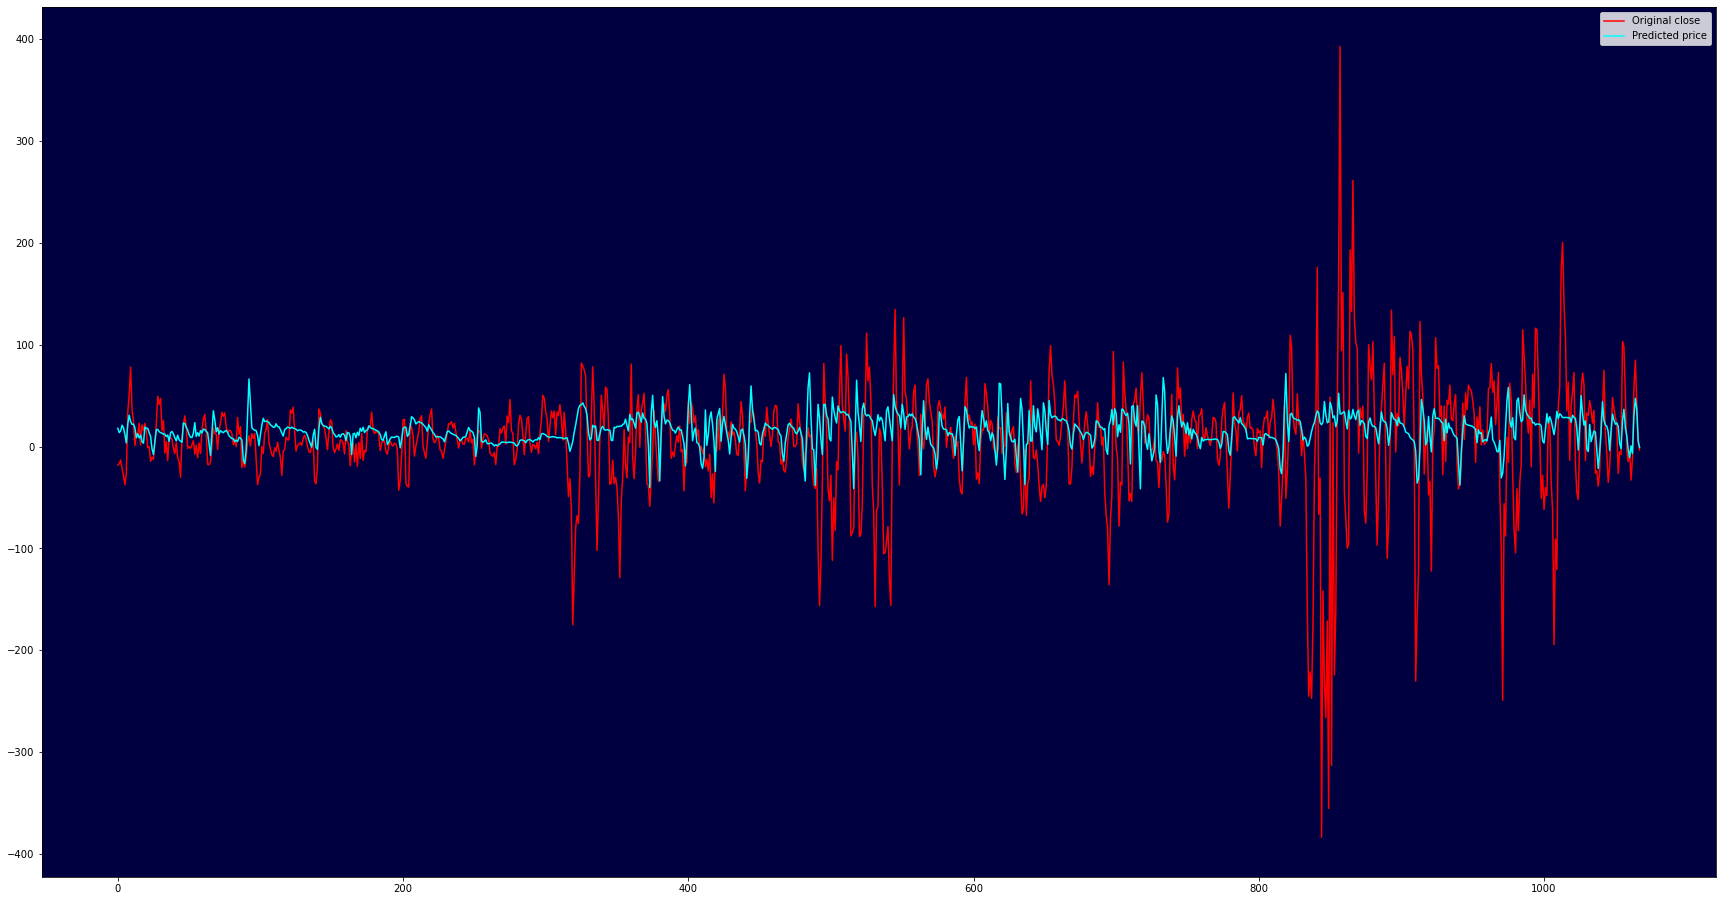

In [82]:
predictions = np.ravel(model.predict(GSPC_x_test).reshape(-1,1))
GSPC_y_test_scaled = GSPC_y_test.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(30,16))
ax.set_facecolor('#000041')
ax.plot(GSPC_y_test_scaled, color='red', label='Original close')
ax.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [83]:
predictions

array([17.878971  , 13.714074  , 15.255469  , ..., 36.736977  ,
        5.654625  , -0.90582925], dtype=float32)

In [84]:
GSPC_y_test_scaled

array([[-18.29003906],
       [-16.75      ],
       [-13.2800293 ],
       ...,
       [ 42.56005859],
       [  3.51000977],
       [ -3.44995117]])

In [85]:
Model3 = proph(holidays_prior_scale = 0.1)
Model3.add_seasonality(name='week', period=5, fourier_order=4)

In [86]:

GSPC_train3 = GSPC_proph[:cutoff]
GSPC_test3 = GSPC_proph[cutoff:]

In [87]:
Model3.fit(GSPC_train3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
GSPC_train3_preds=Model3.predict(GSPC_train3)
GSPC_test3_preds=Model3.predict(GSPC_test3)
testnoind3=GSPC_test.reset_index()

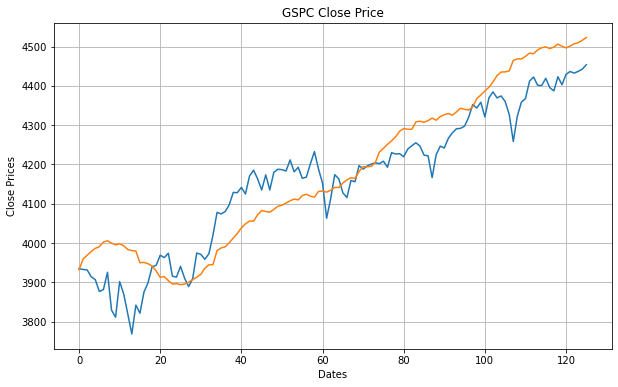

In [89]:

testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind3['y'])
plt.plot(GSPC_test3_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(testnoind3['y'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

In [90]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='2021/08/10', end='2021/09/10', freq='B')

In [91]:
future = pd.DataFrame(date_rng, columns=['y'])
future['y'] = np.random.randint(0,100,size=(len(date_rng)))
future['ds'] = date_rng

In [92]:
date_rng2 = pd.date_range(start='2021/08/13', end='2021/09/13', freq='B')
future2 = pd.DataFrame(date_rng2, columns=['y'])
future2['y'] = np.random.randint(0,100,size=(len(date_rng2)))
future2['ds'] = date_rng2

In [93]:
future2

,y,ds
0,19,2021-08-13
1,77,2021-08-16
2,45,2021-08-17
3,50,2021-08-18
4,60,2021-08-19
5,74,2021-08-20
6,74,2021-08-23
7,73,2021-08-24
8,13,2021-08-25
9,69,2021-08-26


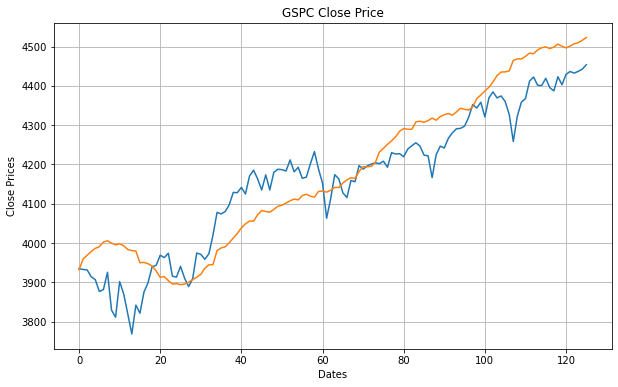

In [94]:
testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind3['y'])
plt.plot(GSPC_test3_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [175]:
rms=np.sqrt(np.mean(np.power((np.array(testnoind3['y'])-GSPC_test3_preds['yhat']),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
80.4380494552148


In [95]:
#forecast = Model3.predict(future)
#fig = m.plot_components(forecast)

In [96]:
Model4 = proph(holidays_prior_scale = 0.1)
Model4.add_seasonality(name='week', period=5, fourier_order=4)

In [97]:
Model4.fit(GSPC_proph)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
GSPC_4_preds=Model4.predict(future)
testnoind3=GSPC_test.reset_index()

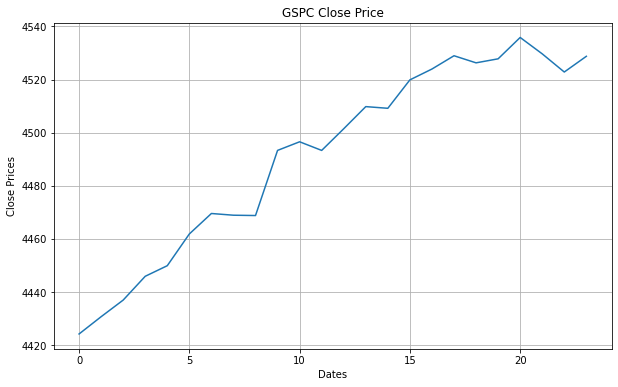

In [99]:
testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
#plt.plot(testnoind3['y'])
plt.plot(GSPC_4_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [100]:
GSPC_4_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,week,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,4438.818761,4324.226824,4527.199204,4438.818761,4438.818761,-14.634109,-14.634109,-14.634109,-6.110214,...,-6.190314,-6.190314,-6.190314,-2.333581,-2.333581,-2.333581,0.0,0.0,0.0,4424.184651
1,2021-08-11,4441.972193,4333.568659,4533.308922,4441.972193,4441.972193,-11.285159,-11.285159,-11.285159,-1.566435,...,-7.548207,-7.548207,-7.548207,-2.170518,-2.170518,-2.170518,0.0,0.0,0.0,4430.687034
2,2021-08-12,4445.125625,4338.880170,4539.364513,4445.125625,4445.125625,-8.177073,-8.177073,-8.177073,1.712309,...,-8.240203,-8.240203,-8.240203,-1.649179,-1.649179,-1.649179,0.0,0.0,0.0,4436.948552
3,2021-08-13,4448.279057,4344.629984,4543.548762,4448.279057,4448.279057,-2.368890,-2.368890,-2.368890,5.593018,...,-7.174941,-7.174941,-7.174941,-0.786968,-0.786968,-0.786968,0.0,0.0,0.0,4445.910167
4,2021-08-16,4457.739354,4347.049747,4547.622929,4457.739354,4457.739354,-7.839866,-7.839866,-7.839866,-1.566435,...,-9.818569,-9.818569,-9.818569,3.545137,3.545137,3.545137,0.0,0.0,0.0,4449.899488
5,2021-08-17,4460.892786,4372.656321,4566.142477,4460.892786,4460.892786,0.956866,0.956866,0.956866,1.712309,...,-6.190314,-6.190314,-6.190314,5.434870,5.434870,5.434870,0.0,0.0,0.0,4461.849652
6,2021-08-18,4464.046218,4377.073798,4579.510626,4464.046218,4464.046218,5.509776,5.509776,5.509776,5.593018,...,-7.548207,-7.548207,-7.548207,7.464965,7.464965,7.464965,0.0,0.0,0.0,4469.555994
7,2021-08-19,4467.199650,4371.651292,4564.392386,4467.199650,4467.199650,1.710991,1.710991,1.710991,0.371322,...,-8.240203,-8.240203,-8.240203,9.579872,9.579872,9.579872,0.0,0.0,0.0,4468.910641
8,2021-08-20,4470.353083,4362.051025,4569.914294,4470.353083,4470.353083,-1.563229,-1.563229,-1.563229,-6.110214,...,-7.174941,-7.174941,-7.174941,11.721926,11.721926,11.721926,0.0,0.0,0.0,4468.789854
9,2021-08-23,4479.813379,4396.037765,4591.467205,4479.813379,4479.813379,13.507254,13.507254,13.507254,5.593018,...,-9.818569,-9.818569,-9.818569,17.732805,17.732805,17.732805,0.0,0.0,0.0,4493.320634


In [101]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['GOOG']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


GOOG
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [102]:
GOOG = pd.read_csv('GOOG_data.csv')

In [103]:
GOOG

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,783.395020,780.400024,781.500000,783.219971,740500,783.219971,GOOG
1,2016-08-15,787.489990,780.109985,783.750000,782.440002,938200,782.440002,GOOG
2,2016-08-16,780.979980,773.443970,780.299988,777.140015,1028000,777.140015,GOOG
3,2016-08-17,780.809998,773.530029,777.320007,779.909973,924200,779.909973,GOOG
4,2016-08-18,782.859985,777.000000,780.010010,777.500000,719400,777.500000,GOOG
...,...,...,...,...,...,...,...,...
1254,2021-08-06,2741.601074,2720.929932,2725.899902,2740.719971,678000,2740.719971,GOOG
1255,2021-08-09,2766.429932,2728.574951,2738.979980,2760.040039,618700,2760.040039,GOOG
1256,2021-08-10,2771.030029,2744.530029,2761.590088,2761.929932,801700,2761.929932,GOOG
1257,2021-08-11,2776.955078,2747.000000,2765.659912,2753.790039,760200,2753.790039,GOOG


In [104]:
GOOG_proph= GOOG
GOOG_proph['ds']=GOOG_proph['Date']
GOOG_proph['y']=GOOG_proph['Close']
GOOG_proph.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [ ]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(GOOG_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

In [105]:
Model5 = proph(holidays_prior_scale = 0.1, seasonality_prior_scale= 0.1,changepoint_prior_scale= 0.5,seasonality_mode='multiplicative')
Model5.add_seasonality(name='week', period=5, fourier_order=4)
Model5.add_seasonality(name='monthly', period=31, fourier_order=1)

In [106]:
GOOG_train = GOOG_proph[:cutoff]
GOOG_test = GOOG_proph[cutoff:]

In [107]:
Model5.fit(GOOG_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
GOOG_train_preds=Model5.predict(GOOG_train)
GOOG_test_preds=Model5.predict(GOOG_test)
testnoind5=GOOG_test.reset_index()

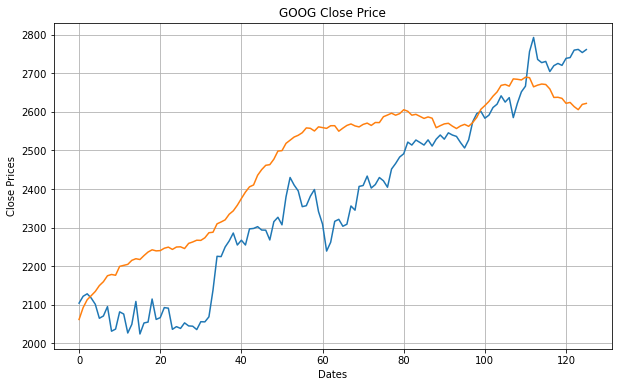

In [109]:
testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind5['y'])
plt.plot(GOOG_test_preds['yhat'])
plt.title('GOOG Close Price')
plt.show()

In [176]:
rms=np.sqrt(np.mean(np.power((np.array(testnoind5['y'])-GOOG_test_preds['yhat']),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
141.0127622039693


In [110]:
Model5_fut = proph(holidays_prior_scale = 0.1, seasonality_prior_scale= 0.1,changepoint_prior_scale= 0.5,seasonality_mode='multiplicative')
Model5_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model5_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

In [111]:
Model5_fut.fit(GOOG_proph)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
GOOG_data_preds=Model5_fut.predict(GOOG_proph)
GOOG_fut_preds=Model5_fut.predict(future)
testnoind6=GOOG_proph.reset_index()

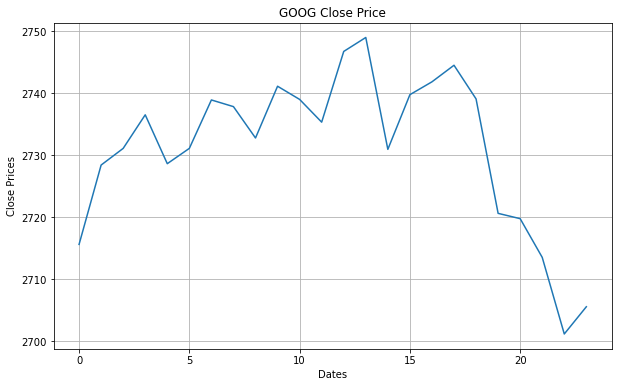

In [113]:

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
#plt.plot(testnoind3['y'])
plt.plot(GOOG_fut_preds['yhat'])
plt.title('GOOG Close Price')
plt.show()

In [114]:
GOOG_fut_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-08-10,2311.168516,2661.891705,2766.734271,2311.168516,2311.168516,0.001939,0.001939,0.001939,0.174999,...,0.118397,0.118397,0.118397,0.057933,0.057933,0.057933,0.0,0.0,0.0,2715.621471
1,2021-08-11,2313.981184,2680.572687,2779.689019,2313.981184,2313.981184,0.002023,0.002023,0.002023,0.179098,...,0.119874,0.119874,0.119874,0.056669,0.056669,0.056669,0.0,0.0,0.0,2728.410880
2,2021-08-12,2316.793852,2680.596225,2783.994311,2316.793852,2316.793852,0.002025,0.002025,0.002025,0.178826,...,0.120623,0.120623,0.120623,0.055539,0.055539,0.055539,0.0,0.0,0.0,2731.096214
3,2021-08-13,2319.606521,2680.966523,2787.791023,2319.606521,2319.606521,0.001943,0.001943,0.001943,0.179730,...,0.121296,0.121296,0.121296,0.054545,0.054545,0.054545,0.0,0.0,0.0,2736.508343
4,2021-08-16,2328.044526,2672.671256,2784.146305,2328.044526,2328.044526,0.001250,0.001250,0.001250,0.172070,...,0.117974,0.117974,0.117974,0.052314,0.052314,0.052314,0.0,0.0,0.0,2728.631683
5,2021-08-17,2330.857194,2675.179560,2785.289877,2330.857194,2330.857194,0.000902,0.000902,0.000902,0.171715,...,0.118397,0.118397,0.118397,0.051777,0.051777,0.051777,0.0,0.0,0.0,2731.099668
6,2021-08-18,2333.669863,2685.293500,2791.121948,2333.669863,2333.669863,0.000516,0.000516,0.000516,0.173647,...,0.119874,0.119874,0.119874,0.051310,0.051310,0.051310,0.0,0.0,0.0,2738.903664
7,2021-08-19,2336.482531,2684.861930,2791.817348,2336.482531,2336.482531,0.000110,0.000110,0.000110,0.171773,...,0.120623,0.120623,0.120623,0.050887,0.050887,0.050887,0.0,0.0,0.0,2737.827888
8,2021-08-20,2339.295199,2681.209125,2785.451143,2339.295199,2339.295199,-0.000302,-0.000302,-0.000302,0.168204,...,0.121296,0.121296,0.121296,0.050479,0.050479,0.050479,0.0,0.0,0.0,2732.772910
9,2021-08-23,2347.733205,2688.611044,2796.467726,2347.733205,2347.733205,-0.001397,-0.001397,-0.001397,0.167558,...,0.117974,0.117974,0.117974,0.049035,0.049035,0.049035,0.0,0.0,0.0,2741.114793


In [115]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['TSLA']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


TSLA
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [116]:
TSLA = pd.read_csv('TSLA_data.csv')
TSLA

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,45.330002,44.807999,45.082001,45.122002,9067500.0,45.122002,TSLA
1,2016-08-15,45.900002,44.986000,45.203999,45.118000,10171500.0,45.118000,TSLA
2,2016-08-16,45.438000,44.681999,45.098000,44.722000,11335500.0,44.722000,TSLA
3,2016-08-17,44.966000,44.560001,44.866001,44.647999,8935500.0,44.647999,TSLA
4,2016-08-18,45.132000,44.458000,44.764000,44.702000,8572500.0,44.702000,TSLA
...,...,...,...,...,...,...,...,...
1254,2021-08-06,716.330017,697.630005,711.900024,699.099976,15576200.0,699.099976,TSLA
1255,2021-08-09,719.030029,705.130005,710.169983,713.760010,14715300.0,713.760010,TSLA
1256,2021-08-10,716.590027,701.880005,713.989990,709.989990,13253000.0,709.989990,TSLA
1257,2021-08-11,715.179993,704.210022,712.710022,707.820007,9739200.0,707.820007,TSLA


In [117]:
TSLA_proph= TSLA
TSLA_proph['ds']=TSLA_proph['Date']
TSLA_proph['y']=TSLA_proph['Close']
TSLA_proph.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [118]:
Model6 = proph(holidays_prior_scale = 0.1)
Model6.add_seasonality(name='week', period=5, fourier_order=4)
Model6.add_seasonality(name='monthly', period=31, fourier_order=1)

In [119]:
TSLA_train = TSLA_proph[:cutoff]
TSLA_test = TSLA_proph[cutoff:]

In [120]:
Model6.fit(TSLA_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
TSLA_train_preds=Model6.predict(TSLA_train)
TSLA_test_preds=Model6.predict(TSLA_test)
testnoind7=TSLA_test.reset_index()

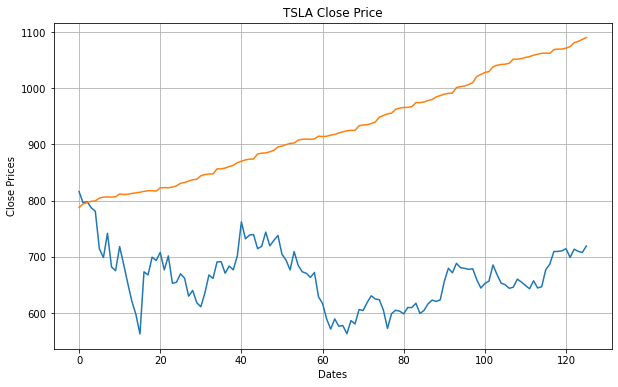

In [122]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind7['y'])
plt.plot(TSLA_test_preds['yhat'])
plt.title('TSLA Close Price')
plt.show()

In [123]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['IBM']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

IBM
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [124]:
IBM = pd.read_csv('IBM_data.csv')
IBM

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,163.460007,161.520004,163.190002,161.949997,2543100.0,129.304337,IBM
1,2016-08-15,162.970001,161.779999,162.399994,161.880005,2970400.0,129.248474,IBM
2,2016-08-16,161.929993,160.690002,161.110001,160.699997,2210200.0,128.306335,IBM
3,2016-08-17,161.160004,159.839996,160.970001,160.440002,3225900.0,128.098724,IBM
4,2016-08-18,162.000000,160.440002,160.889999,161.360001,3652000.0,128.833298,IBM
...,...,...,...,...,...,...,...,...
1254,2021-08-06,144.389999,142.889999,143.000000,144.089996,3822600.0,142.449997,IBM
1255,2021-08-09,142.500000,140.970001,142.199997,141.250000,4904100.0,141.250000,IBM
1256,2021-08-10,141.809998,140.339996,141.210007,141.380005,5298800.0,141.380005,IBM
1257,2021-08-11,142.770004,141.500000,141.779999,142.130005,4259500.0,142.130005,IBM


In [125]:
def Premodeling(df, trainsize=.9):
    df['ds']=df['Date']
    df['y']=df['Close']
    df.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)
    cutoff=round(df.shape[0]*trainsize)
    df_train =df[:cutoff]
    df_test = df[cutoff:]
    return df, df_train,df_test

In [126]:
def Premodeling2(df, trainsize=.9):
    df['ds']=df['Date']
    df['y']=df['Close']
    df.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)
    return df

In [127]:
IBM_proph, IBM_train, IBM_test =Premodeling(IBM)

In [128]:
IBM_proph

,ds,y
0,2016-08-12,161.949997
1,2016-08-15,161.880005
2,2016-08-16,160.699997
3,2016-08-17,160.440002
4,2016-08-18,161.360001
...,...,...
1254,2021-08-06,144.089996
1255,2021-08-09,141.250000
1256,2021-08-10,141.380005
1257,2021-08-11,142.130005


In [129]:
def Prophtest(Model,train, test):
    Model.fit(train)
    pred=Model.predict(test)
    testnoind=test.reset_index()
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Close Prices')
    plt.plot()
    plt.plot(testnoind['y'])
    plt.plot(pred ['yhat'])
    plt.title('Close Price')
    plt.show()

In [130]:
Model7 = proph(holidays_prior_scale = 0.1)
Model7.add_seasonality(name='week', period=5, fourier_order=4)
Model7.add_seasonality(name='monthly', period=31, fourier_order=1)

In [131]:
Model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


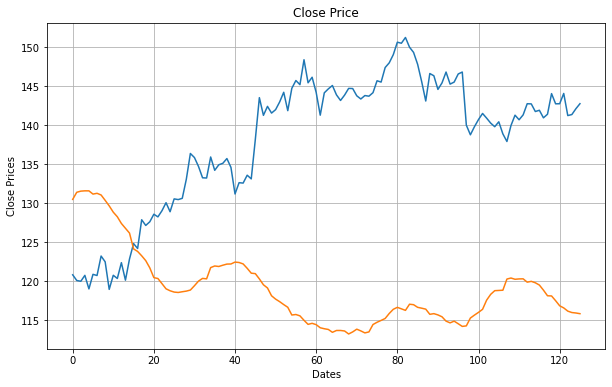

In [132]:
Prophtest(Model7,IBM_train, IBM_test)

In [133]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^DJI']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

^DJI
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [185]:
import pandas_datareader

pandas_datareader.__version__

'0.10.0'

In [182]:
import pandas_datareader.data as web
def download_stocks(stock):
    stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
    stock_df['Name'] = stock
    return stock_df


In [184]:
download_stocks('GOOG')

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2016-08-12,783.395020,780.400024,781.500000,783.219971,740500,783.219971,GOOG
2016-08-15,787.489990,780.109985,783.750000,782.440002,938200,782.440002,GOOG
2016-08-16,780.979980,773.443970,780.299988,777.140015,1028000,777.140015,GOOG
2016-08-17,780.809998,773.530029,777.320007,779.909973,924200,779.909973,GOOG
2016-08-18,782.859985,777.000000,780.010010,777.500000,719400,777.500000,GOOG
...,...,...,...,...,...,...,...
2021-08-06,2741.601074,2720.929932,2725.899902,2740.719971,678000,2740.719971,GOOG
2021-08-09,2766.429932,2728.574951,2738.979980,2760.040039,618700,2760.040039,GOOG
2021-08-10,2771.030029,2744.530029,2761.590088,2761.929932,801700,2761.929932,GOOG


In [136]:
DJI = pd.read_csv('^DJI_data.csv')
DJI

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,18606.060547,18535.859375,18595.650391,18576.470703,61580000,18576.470703,^DJI
1,2016-08-15,18722.609375,18559.929688,18588.589844,18636.050781,62350000,18636.050781,^DJI
2,2016-08-16,18614.859375,18550.650391,18614.480469,18552.019531,67570000,18552.019531,^DJI
3,2016-08-17,18582.349609,18468.679688,18537.089844,18573.939453,71000000,18573.939453,^DJI
4,2016-08-18,18600.820312,18533.289062,18566.539062,18597.699219,70740000,18597.699219,^DJI
...,...,...,...,...,...,...,...,...
1254,2021-08-06,35246.789062,35077.441406,35077.441406,35208.511719,231570000,35208.511719,^DJI
1255,2021-08-09,35229.671875,35041.238281,35229.671875,35101.851562,207850000,35101.851562,^DJI
1256,2021-08-10,35285.160156,35091.910156,35135.171875,35264.671875,255040000,35264.671875,^DJI
1257,2021-08-11,35501.160156,35300.890625,35300.890625,35484.968750,232800000,35484.968750,^DJI


In [137]:
DJI_proph, DJI_train, DJI_test =Premodeling(DJI)

In [ ]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(DJI_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

In [138]:
Model8 = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model8.add_seasonality(name='week', period=5, fourier_order=4)
Model8.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


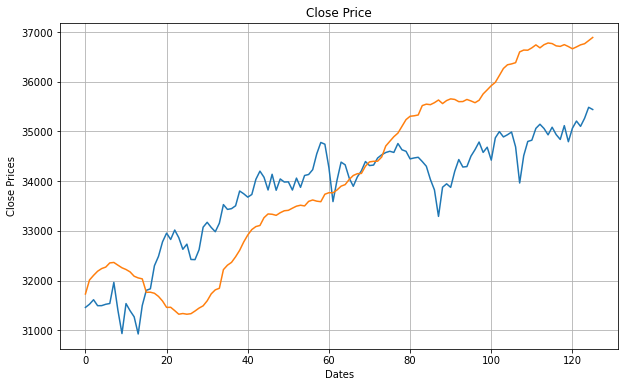

In [139]:
Prophtest(Model8,DJI_train, DJI_test)

In [179]:
djipreds=Model8.predict(DJI_test)
djinoind= DJI_test.reset_index()
rms=np.sqrt(np.mean(np.power((np.array(djinoind['y'])-djipreds['yhat']),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
1153.2100187567637


In [140]:
Model8_fut = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model8_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model8_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

In [141]:
def Prophfut(Model,train):
    Model.fit(train)
    pred=Model.predict(future)
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Close Prices')
    plt.plot()
    plt.plot(pred['yhat'])
    plt.title('Future Close Price')
    plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


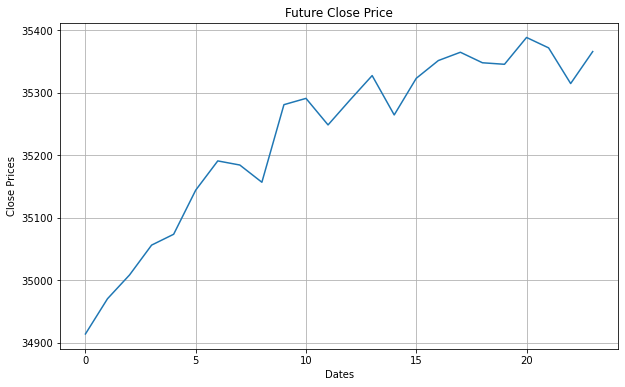

In [142]:
Prophfut(Model8_fut, DJI_proph)

In [143]:
DJI_fut=Model8_fut.predict(future)
DJI_fut

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,35111.888276,34224.416431,35739.424219,35111.888276,35111.888276,-197.602838,-197.602838,-197.602838,-4.121458,...,120.190932,120.190932,120.190932,-266.382398,-266.382398,-266.382398,0.0,0.0,0.0,34914.285438
1,2021-08-11,35132.925271,34238.596766,35721.911198,35132.925271,35132.925271,-162.312251,-162.312251,-162.312251,4.816274,...,121.356892,121.356892,121.356892,-278.135029,-278.135029,-278.135029,0.0,0.0,0.0,34970.613020
2,2021-08-12,35153.962265,34154.420970,35813.801865,35153.962265,35153.962265,-145.308008,-145.308008,-145.308008,13.556826,...,113.466447,113.466447,113.466447,-286.855120,-286.855120,-286.855120,0.0,0.0,0.0,35008.654257
3,2021-08-13,35174.999260,34247.670930,35767.980476,35174.999260,35174.999260,-118.637850,-118.637850,-118.637850,21.742361,...,118.682597,118.682597,118.682597,-292.690674,-292.690674,-292.690674,0.0,0.0,0.0,35056.361409
4,2021-08-16,35238.110243,34332.803477,35811.390063,35238.110243,35238.110243,-164.400611,-164.400611,-164.400611,39.812128,...,101.533933,101.533933,101.533933,-295.396284,-295.396284,-295.396284,0.0,0.0,0.0,35073.709632
5,2021-08-17,35259.147237,34425.225347,35895.702580,35259.147237,35259.147237,-114.920558,-114.920558,-114.920558,42.849992,...,120.190932,120.190932,120.190932,-292.485320,-292.485320,-292.485320,0.0,0.0,0.0,35144.226679
6,2021-08-18,35280.184232,34443.280570,35925.885389,35280.184232,35280.184232,-89.218006,-89.218006,-89.218006,44.133571,...,121.356892,121.356892,121.356892,-288.336335,-288.336335,-288.336335,0.0,0.0,0.0,35190.966226
7,2021-08-19,35301.221226,34420.061777,35928.898128,35301.221226,35301.221226,-116.826055,-116.826055,-116.826055,43.610318,...,113.466447,113.466447,113.466447,-283.391417,-283.391417,-283.391417,0.0,0.0,0.0,35184.395171
8,2021-08-20,35322.258221,34365.447684,35897.861144,35322.258221,35322.258221,-165.408685,-165.408685,-165.408685,41.301652,...,118.682597,118.682597,118.682597,-278.103020,-278.103020,-278.103020,0.0,0.0,0.0,35156.849535
9,2021-08-23,35385.369204,34461.686444,36059.501947,35385.369204,35385.369204,-104.488498,-104.488498,-104.488498,24.947781,...,101.533933,101.533933,101.533933,-264.598078,-264.598078,-264.598078,0.0,0.0,0.0,35280.880705


In [144]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['FB']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

FB
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [145]:
FB = pd.read_csv('FB_data.csv')
FB

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,125.000000,124.180000,124.699997,124.879997,12159000,124.879997,FB
1,2016-08-15,124.919998,123.699997,124.910004,123.900002,19295100,123.900002,FB
2,2016-08-16,123.919998,122.779999,123.500000,123.300003,14222400,123.300003,FB
3,2016-08-17,124.379997,122.849998,123.660004,124.370003,13794200,124.370003,FB
4,2016-08-18,124.260002,123.639999,124.010002,123.910004,12400800,123.910004,FB
...,...,...,...,...,...,...,...,...
1254,2021-08-06,365.149994,361.399994,361.399994,363.510010,8918100,363.510010,FB
1255,2021-08-09,365.779999,360.750000,363.760010,361.609985,7798900,361.609985,FB
1256,2021-08-10,364.100006,359.040009,361.829987,361.130005,7466900,361.130005,FB
1257,2021-08-11,362.359985,357.809998,362.100006,359.959991,8397300,359.959991,FB


In [146]:
FB_proph, FB_train, FB_test = Premodeling(FB)

In [ ]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(FB_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

In [147]:
Model9 = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model9.add_seasonality(name='week', period=5, fourier_order=4)
Model9.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


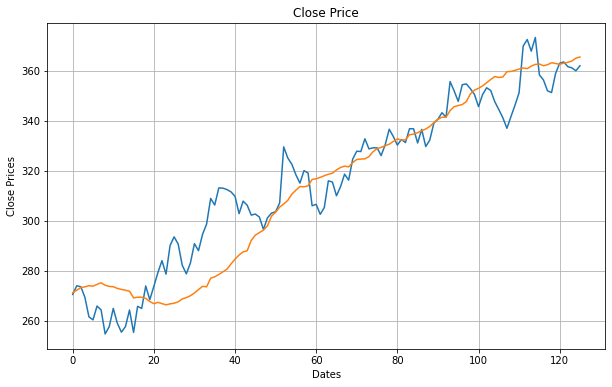

In [148]:
Prophtest(Model9,FB_train, FB_test)

In [181]:
FBpreds=Model9.predict(FB_test)
FBnoind= FB_test.reset_index()
rms=np.sqrt(np.mean(np.power((np.array(FBnoind['y'])-FBpreds['yhat']),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
12.479993102569281


In [149]:
Model9_fut = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model9_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model9_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


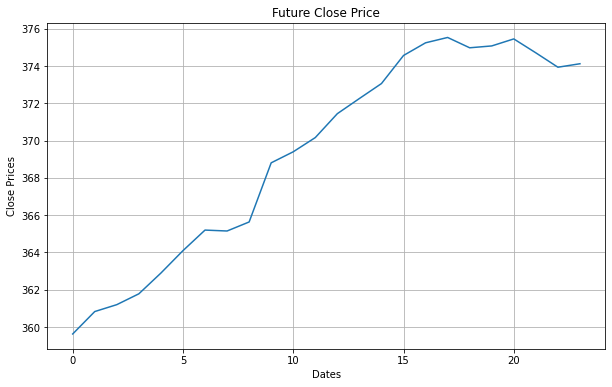

In [150]:
Prophfut(Model9_fut,FB_proph)

In [151]:
fb_fut=Model9_fut.predict(future)
fb_fut

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,346.620692,349.839256,369.234514,346.620692,346.620692,13.005744,13.005744,13.005744,0.115268,...,-2.461356,-2.461356,-2.461356,15.871798,15.871798,15.871798,0.0,0.0,0.0,359.626436
1,2021-08-11,346.905249,351.727452,371.187788,346.905249,346.905249,13.924327,13.924327,13.924327,-0.055332,...,-2.274591,-2.274591,-2.274591,16.133246,16.133246,16.133246,0.0,0.0,0.0,360.829576
2,2021-08-12,347.189806,351.167942,371.368828,347.189806,347.189806,14.009873,14.009873,14.009873,-0.223667,...,-2.443454,-2.443454,-2.443454,16.439632,16.439632,16.439632,0.0,0.0,0.0,361.199679
3,2021-08-13,347.474363,351.792752,371.795091,347.474363,347.474363,14.306957,14.306957,14.306957,-0.382845,...,-2.511626,-2.511626,-2.511626,16.788125,16.788125,16.788125,0.0,0.0,0.0,361.781320
4,2021-08-16,348.328035,353.669762,373.148789,348.328035,348.328035,14.567166,14.567166,14.567166,-0.743718,...,-2.855264,-2.855264,-2.855264,18.045144,18.045144,18.045144,0.0,0.0,0.0,362.895201
5,2021-08-17,348.612593,354.438981,374.141115,348.612593,348.612593,15.484492,15.484492,15.484492,-0.808684,...,-2.461356,-2.461356,-2.461356,18.517170,18.517170,18.517170,0.0,0.0,0.0,364.097085
6,2021-08-18,348.897150,355.060865,375.356860,348.897150,348.897150,16.303542,16.303542,16.303542,-0.840542,...,-2.274591,-2.274591,-2.274591,19.005372,19.005372,19.005372,0.0,0.0,0.0,365.200692
7,2021-08-19,349.181707,355.058433,374.726368,349.181707,349.181707,15.969668,15.969668,15.969668,-0.837988,...,-2.443454,-2.443454,-2.443454,19.502813,19.502813,19.502813,0.0,0.0,0.0,365.151375
8,2021-08-20,349.466265,355.787005,375.229749,349.466265,349.466265,16.169517,16.169517,16.169517,-0.801127,...,-2.511626,-2.511626,-2.511626,20.002236,20.002236,20.002236,0.0,0.0,0.0,365.635782
9,2021-08-23,350.319937,358.740940,379.030315,350.319937,350.319937,18.489316,18.489316,18.489316,-0.506388,...,-2.855264,-2.855264,-2.855264,21.437665,21.437665,21.437665,0.0,0.0,0.0,368.809252


In [152]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['RF']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

RF
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [153]:
RF = pd.read_csv('RF_data.csv')
RF

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-12,9.230000,9.140000,9.210000,9.230000,9984200.0,7.886822,RF
1,2016-08-15,9.580000,9.280000,9.290000,9.560000,18672200.0,8.168802,RF
2,2016-08-16,9.620000,9.450000,9.500000,9.540000,17488000.0,8.151712,RF
3,2016-08-17,9.580000,9.490000,9.530000,9.550000,16724800.0,8.160257,RF
4,2016-08-18,9.630000,9.520000,9.550000,9.630000,12426300.0,8.228616,RF
...,...,...,...,...,...,...,...,...
1254,2021-08-06,20.180000,19.780001,19.860001,19.959999,5424900.0,19.959999,RF
1255,2021-08-09,20.170000,19.629999,19.830000,19.889999,4779500.0,19.889999,RF
1256,2021-08-10,20.250000,19.770000,19.809999,20.190001,6795500.0,20.190001,RF
1257,2021-08-11,20.709999,20.049999,20.260000,20.620001,7003500.0,20.620001,RF


In [154]:
RF_proph, RF_train, RF_test = Premodeling(RF, trainsize=.90)

In [155]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(RF_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f43e42398e0>


KeyboardInterrupt: 

In [156]:
Model10 = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'multiplicative')
Model10.add_seasonality(name='week', period=5, fourier_order=4)
Model10.add_seasonality(name='monthly', period=31, fourier_order=1)

In [157]:
Model10_fut = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'multiplicative')
Model10_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model10_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


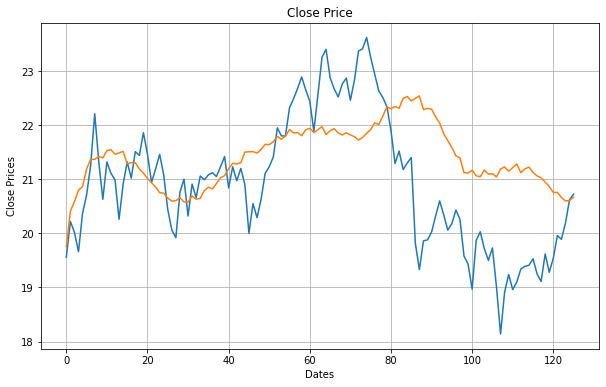

In [158]:
Prophtest(Model10,RF_train, RF_test)

In [186]:
RFpreds=Model10.predict(RF_test)
RFnoind= RF_test.reset_index()
rms=np.sqrt(np.mean(np.power((np.array(RFnoind['y'])-RFpreds['yhat']),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
1.173135748549652


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


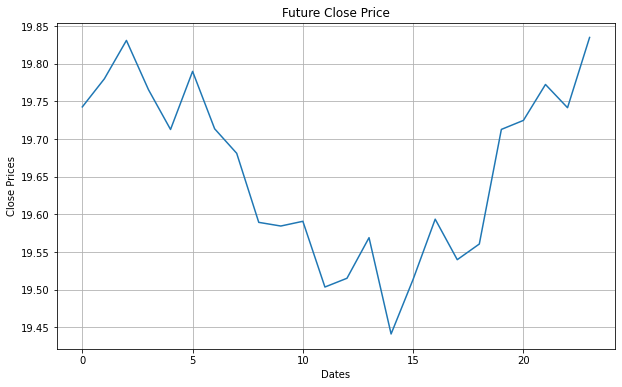

In [159]:
Prophfut(Model10_fut,RF_proph)

In [160]:
reg_fut=Model10_fut.predict(future)
reg_fut

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-08-10,7.142045,18.933365,20.531750,7.142045,7.142045,0.002924,0.002924,0.002924,1.764305,...,2.135914,2.135914,2.135914,-0.366692,-0.366692,-0.366692,0.0,0.0,0.0,19.742788
1,2021-08-11,7.150605,18.914845,20.579330,7.150605,7.150605,0.003866,0.003866,0.003866,1.766214,...,2.135419,2.135419,2.135419,-0.371211,-0.371211,-0.371211,0.0,0.0,0.0,19.780105
2,2021-08-12,7.159164,18.979742,20.671493,7.159164,7.159164,0.004649,0.004649,0.004649,1.770025,...,2.133258,2.133258,2.133258,-0.375908,-0.375908,-0.375908,0.0,0.0,0.0,19.831066
3,2021-08-13,7.167723,18.934471,20.568548,7.167723,7.167723,0.005242,0.005242,0.005242,1.757591,...,2.132536,2.132536,2.132536,-0.380767,-0.380767,-0.380767,0.0,0.0,0.0,19.765649
4,2021-08-16,7.193401,18.879627,20.495963,7.193401,7.193401,0.005681,0.005681,0.005681,1.740400,...,2.132714,2.132714,2.132714,-0.396135,-0.396135,-0.396135,0.0,0.0,0.0,19.712797
5,2021-08-17,7.201960,18.957999,20.554937,7.201960,7.201960,0.005360,0.005360,0.005360,1.747857,...,2.135914,2.135914,2.135914,-0.401443,-0.401443,-0.401443,0.0,0.0,0.0,19.789958
6,2021-08-18,7.210520,18.923535,20.537421,7.210520,7.210520,0.004820,0.004820,0.004820,1.734022,...,2.135419,2.135419,2.135419,-0.406798,-0.406798,-0.406798,0.0,0.0,0.0,19.713718
7,2021-08-19,7.219079,18.911630,20.498326,7.219079,7.219079,0.004083,0.004083,0.004083,1.726268,...,2.133258,2.133258,2.133258,-0.412168,-0.412168,-0.412168,0.0,0.0,0.0,19.681147
8,2021-08-20,7.227638,18.664804,20.401747,7.227638,7.227638,0.003179,0.003179,0.003179,1.710354,...,2.132536,2.132536,2.132536,-0.417519,-0.417519,-0.417519,0.0,0.0,0.0,19.589459
9,2021-08-23,7.253316,18.728745,20.415056,7.253316,7.253316,-0.000143,-0.000143,-0.000143,1.700086,...,2.132714,2.132714,2.132714,-0.433066,-0.433066,-0.433066,0.0,0.0,0.0,19.584578


In [161]:
import pickle

In [162]:
with open('model_name.pkl', 'wb') as f:
    pickle.dump(model_name, f)

NameError: name 'model_name' is not defined

In [ ]:
with open('Model4.pkl', 'wb') as f:
    pickle.dump(Model4, f)

In [ ]:
with open('Model5_fut.pkl', 'wb') as f:
    pickle.dump(Model5_fut, f)

In [ ]:
with open('Model8_fut.pkl', 'wb') as f:
    pickle.dump(Model8_fut, f)

In [ ]:
with open('Model9_fut.pkl', 'wb') as f:
    pickle.dump(Model9_fut, f)

In [ ]:
with open('Model10_fut.pkl', 'wb') as f:
    pickle.dump(Model10_fut, f)

In [ ]:
from datetime import datetime, timedelta

In [ ]:
x=datetime.today() + timedelta(days=30)

In [ ]:
x

In [ ]:
x.strftime('%Y-%m-%d')

In [165]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['AMC']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

AMC
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [166]:
AMC = pd.read_csv('AMC_data.csv')


In [167]:
def Premodeling(df, trainsize=.9):
    df['ds']=df['Date']
    df['y']=df['Close']
    df.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)
    cutoff=round(df.shape[0]*trainsize)
    df_train =df[:cutoff]
    df_test = df[cutoff:]
    return df, df_train,df_test

In [168]:
amc_proph, amc_train, amc_test=Premodeling(AMC)

In [169]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(amc_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f44d2d8df70>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4390320a30>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4390330760>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f43902ddb80>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurre

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


In [170]:
Model12 = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model12.add_seasonality(name='week', period=5, fourier_order=4)
Model12.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


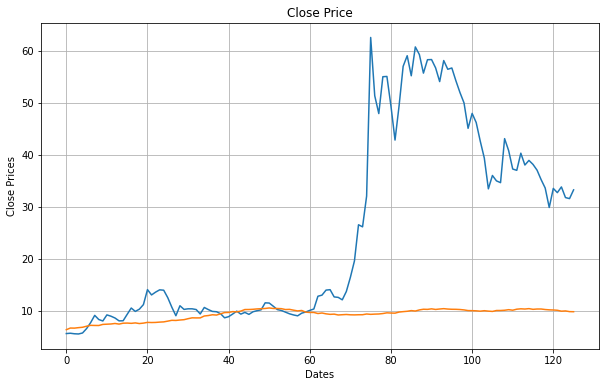

In [172]:
Prophtest(Model12,amc_train, amc_test)

In [173]:
Model12_fut = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model12_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model12_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


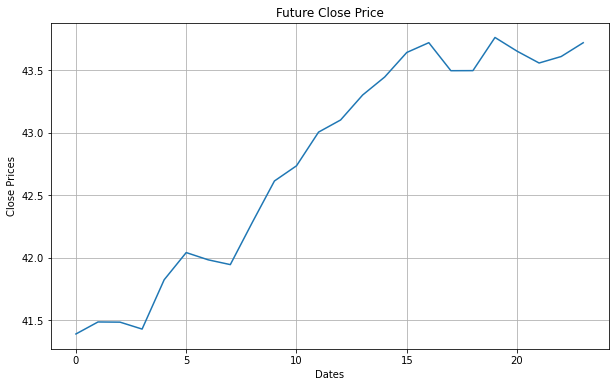

In [174]:
Prophfut(Model12_fut,amc_proph)